# Food 101 Datase Mining and Machine learning

## Download dataset from Kaggle

- Install kaggle API to google colab

In [ ]:
!pip install kaggle

#### Import API key from Kaggle
- You need an API token to authenticate the download from Kaggle.

1. Go to your Kaggle account settings.
2. Scroll down to the API section and click on Create New API Token. This will download a file called kaggle.json to your computer.
3. Upload this file to your Colab environment using:

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"helloworld2368","key":"e7fffa8b00ad66a8941a5b2c161567a3"}'}

#### Move the Kaggle Token to the Right Location
- You need to place the kaggle.json file in a specific directory to use the Kaggle API:

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


### Download the dataset Food 101

In [ ]:
!kaggle datasets download -d hari31416/food-101


Dataset URL: https://www.kaggle.com/datasets/hari31416/food-101
License(s): other
100% 4.65G/4.66G [01:07<00:00, 131MB/s]
100% 4.66G/4.66G [01:07<00:00, 74.0MB/s]


### Unzip the food41.zip file to datasets folder

In [ ]:
# importing required modules
from zipfile import ZipFile

In [ ]:
file_name = "food-101.zip"
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Streaming output truncated to the last 5000 lines.
food-101/validation/baby_back_ribs/1099273.jpg 2023-02-20 06:37:06        50697
food-101/validation/baby_back_ribs/1221409.jpg 2023-02-20 06:37:06        28968
food-101/validation/baby_back_ribs/1334446.jpg 2023-02-20 06:37:06        58312
food-101/validation/baby_back_ribs/1347489.jpg 2023-02-20 06:37:06        61596
food-101/validation/baby_back_ribs/1392004.jpg 2023-02-20 06:37:06        53433
food-101/validation/baby_back_ribs/1520322.jpg 2023-02-20 06:37:06        44902
food-101/validation/baby_back_ribs/1667679.jpg 2023-02-20 06:37:06        73561
food-101/validation/baby_back_ribs/1774172.jpg 2023-02-20 06:37:06        69167
food-101/validation/baby_back_ribs/1839467.jpg 2023-02-20 06:37:06        45740
food-101/validation/baby_back_ribs/184567.jpg  2023-02-20 06:37:06        49124
food-101/validation/baby_back_ribs/1878380.jpg 2023-02-20 06:37:06        58076
food-101/validation/baby_back_ribs/1879515.jpg 2023-02-20 06:37:06   

In [ ]:
# !unzip food-101.zip -d /content/datasets/food101

Streaming output truncated to the last 5000 lines.
  inflating: /content/datasets/food101/images/tacos/1026681.jpg  
  inflating: /content/datasets/food101/images/tacos/1030289.jpg  
  inflating: /content/datasets/food101/images/tacos/1033196.jpg  
  inflating: /content/datasets/food101/images/tacos/1036030.jpg  
  inflating: /content/datasets/food101/images/tacos/1042175.jpg  
  inflating: /content/datasets/food101/images/tacos/1044043.jpg  
  inflating: /content/datasets/food101/images/tacos/1058697.jpg  
  inflating: /content/datasets/food101/images/tacos/1059239.jpg  
  inflating: /content/datasets/food101/images/tacos/1059326.jpg  
  inflating: /content/datasets/food101/images/tacos/1066762.jpg  
  inflating: /content/datasets/food101/images/tacos/1070967.jpg  
  inflating: /content/datasets/food101/images/tacos/1073468.jpg  
  inflating: /content/datasets/food101/images/tacos/1075296.jpg  
  inflating: /content/datasets/food101/images/tacos/1085243.jpg  
  inflating: /content/dat

# Create training data and label trainging data

In [ ]:
import os

os.chdir('/content/food-101/')

for folder in os.listdir():
  print(folder)

validation
train


In [ ]:
import os

for root, dirs, files in os.walk('/content/food-101/train'):
    print(f"Current directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print(f"Number of files: {len(files)}")
    print('-' * 40)

Current directory: /content/food-101/train
Subdirectories: ['caesar_salad', 'lobster_bisque', 'hamburger', 'chicken_quesadilla', 'creme_brulee', 'apple_pie', 'cannoli', 'spaghetti_carbonara', 'paella', 'foie_gras', 'edamame', 'gyoza', 'cheese_plate', 'beet_salad', 'fish_and_chips', 'lobster_roll_sandwich', 'hot_dog', 'onion_rings', 'pork_chop', 'chicken_wings', 'french_toast', 'ice_cream', 'ceviche', 'beef_carpaccio', 'guacamole', 'nachos', 'red_velvet_cake', 'club_sandwich', 'dumplings', 'mussels', 'clam_chowder', 'falafel', 'grilled_cheese_sandwich', 'prime_rib', 'cheesecake', 'tacos', 'lasagna', 'garlic_bread', 'greek_salad', 'tiramisu', 'spaghetti_bolognese', 'macaroni_and_cheese', 'sushi', 'escargots', 'macarons', 'chocolate_mousse', 'ravioli', 'fried_calamari', 'seaweed_salad', 'hummus', 'miso_soup', 'omelette', 'shrimp_and_grits', 'cup_cakes', 'sashimi', 'pulled_pork_sandwich', 'steak', 'risotto', 'grilled_salmon', 'gnocchi', 'chicken_curry', 'carrot_cake', 'ramen', 'hot_and_sou

In [ ]:
import os

for root, dirs, files in os.walk('/content/food-101/validation'):
    print(f"Current directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print(f"Number of files: {len(files)}")
    print('-' * 40)

Current directory: /content/food-101/validation
Subdirectories: ['caesar_salad', 'lobster_bisque', 'hamburger', 'chicken_quesadilla', 'creme_brulee', 'apple_pie', 'cannoli', 'spaghetti_carbonara', 'paella', 'foie_gras', 'edamame', 'gyoza', 'cheese_plate', 'beet_salad', 'fish_and_chips', 'lobster_roll_sandwich', 'hot_dog', 'onion_rings', 'pork_chop', 'chicken_wings', 'french_toast', 'ice_cream', 'ceviche', 'beef_carpaccio', 'guacamole', 'nachos', 'red_velvet_cake', 'club_sandwich', 'dumplings', 'mussels', 'clam_chowder', 'falafel', 'grilled_cheese_sandwich', 'prime_rib', 'cheesecake', 'tacos', 'lasagna', 'garlic_bread', 'greek_salad', 'tiramisu', 'spaghetti_bolognese', 'macaroni_and_cheese', 'sushi', 'escargots', 'macarons', 'chocolate_mousse', 'ravioli', 'fried_calamari', 'seaweed_salad', 'hummus', 'miso_soup', 'omelette', 'shrimp_and_grits', 'cup_cakes', 'sashimi', 'pulled_pork_sandwich', 'steak', 'risotto', 'grilled_salmon', 'gnocchi', 'chicken_curry', 'carrot_cake', 'ramen', 'hot_an

In [ ]:
import os

for root, dirs, files in os.walk('/content/food-101/'):
    print(f"Current directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print(f"Number of files: {len(files)}")
    print('-' * 40)

Current directory: /content/food-101/
Subdirectories: ['validation', 'train']
Files: []
Number of files: 0
----------------------------------------
Current directory: /content/food-101/validation
Subdirectories: ['caesar_salad', 'lobster_bisque', 'hamburger', 'chicken_quesadilla', 'creme_brulee', 'apple_pie', 'cannoli', 'spaghetti_carbonara', 'paella', 'foie_gras', 'edamame', 'gyoza', 'cheese_plate', 'beet_salad', 'fish_and_chips', 'lobster_roll_sandwich', 'hot_dog', 'onion_rings', 'pork_chop', 'chicken_wings', 'french_toast', 'ice_cream', 'ceviche', 'beef_carpaccio', 'guacamole', 'nachos', 'red_velvet_cake', 'club_sandwich', 'dumplings', 'mussels', 'clam_chowder', 'falafel', 'grilled_cheese_sandwich', 'prime_rib', 'cheesecake', 'tacos', 'lasagna', 'garlic_bread', 'greek_salad', 'tiramisu', 'spaghetti_bolognese', 'macaroni_and_cheese', 'sushi', 'escargots', 'macarons', 'chocolate_mousse', 'ravioli', 'fried_calamari', 'seaweed_salad', 'hummus', 'miso_soup', 'omelette', 'shrimp_and_grits

In [ ]:
labels = []

for root, dirs, files in os.walk('/content/food-101/train/'):
    print(f"Current directory: {root}")
    label = root.split("/")[-1]
    labels.append(label)


Current directory: /content/food-101/train/
Current directory: /content/food-101/train/caesar_salad
Current directory: /content/food-101/train/lobster_bisque
Current directory: /content/food-101/train/hamburger
Current directory: /content/food-101/train/chicken_quesadilla
Current directory: /content/food-101/train/creme_brulee
Current directory: /content/food-101/train/apple_pie
Current directory: /content/food-101/train/cannoli
Current directory: /content/food-101/train/spaghetti_carbonara
Current directory: /content/food-101/train/paella
Current directory: /content/food-101/train/foie_gras
Current directory: /content/food-101/train/edamame
Current directory: /content/food-101/train/gyoza
Current directory: /content/food-101/train/cheese_plate
Current directory: /content/food-101/train/beet_salad
Current directory: /content/food-101/train/fish_and_chips
Current directory: /content/food-101/train/lobster_roll_sandwich
Current directory: /content/food-101/train/hot_dog
Current directory

In [ ]:
labels.sort()

labels.pop(0)

for label in labels:
  print(label)

apple_pie
baby_back_ribs
baklava
beef_carpaccio
beef_tartare
beet_salad
beignets
bibimbap
bread_pudding
breakfast_burrito
bruschetta
caesar_salad
cannoli
caprese_salad
carrot_cake
ceviche
cheese_plate
cheesecake
chicken_curry
chicken_quesadilla
chicken_wings
chocolate_cake
chocolate_mousse
churros
clam_chowder
club_sandwich
crab_cakes
creme_brulee
croque_madame
cup_cakes
deviled_eggs
donuts
dumplings
edamame
eggs_benedict
escargots
falafel
filet_mignon
fish_and_chips
foie_gras
french_fries
french_onion_soup
french_toast
fried_calamari
fried_rice
frozen_yogurt
garlic_bread
gnocchi
greek_salad
grilled_cheese_sandwich
grilled_salmon
guacamole
gyoza
hamburger
hot_and_sour_soup
hot_dog
huevos_rancheros
hummus
ice_cream
lasagna
lobster_bisque
lobster_roll_sandwich
macaroni_and_cheese
macarons
miso_soup
mussels
nachos
omelette
onion_rings
oysters
pad_thai
paella
pancakes
panna_cotta
peking_duck
pho
pizza
pork_chop
poutine
prime_rib
pulled_pork_sandwich
ramen
ravioli
red_velvet_cake
risotto
sa

# Explore the data and create model

In [ ]:
# Please run this before start using the notebook

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

import numpy as np
print(f"NumPy version: {np.__version__}")

import matplotlib
print(f"Matplotlib version: {matplotlib.__version__}")

import pandas as pd
print(f"Pandas version: {pd.__version__}")

import sklearn
print(f"Scikit-Learn version: {sklearn.__version__}")

import matplotlib.pyplot as plt

Notebook last run (end-to-end): 2024-10-14 02:16:02.679842
TensorFlow version: 2.17.0
NumPy version: 1.26.4
Matplotlib version: 3.7.1
Pandas version: 2.2.2
Scikit-Learn version: 1.5.2


In [ ]:
print(tf.config.list_physical_devices("GPU"))

[]


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("/content/food-101"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '/content/food-101'.
There are 101 directories and 0 images in '/content/food-101/validation'.
There are 0 directories and 50 images in '/content/food-101/validation/caesar_salad'.
There are 0 directories and 50 images in '/content/food-101/validation/lobster_bisque'.
There are 0 directories and 50 images in '/content/food-101/validation/hamburger'.
There are 0 directories and 50 images in '/content/food-101/validation/chicken_quesadilla'.
There are 0 directories and 50 images in '/content/food-101/validation/creme_brulee'.
There are 0 directories and 50 images in '/content/food-101/validation/apple_pie'.
There are 0 directories and 50 images in '/content/food-101/validation/cannoli'.
There are 0 directories and 50 images in '/content/food-101/validation/spaghetti_carbonara'.
There are 0 directories and 50 images in '/content/food-101/validation/paella'.
There are 0 directories and 50 images in '/content/food-101/validation/foie_gras'.
There are 

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("/content/food-101/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)
print("Number of classes:", len(class_names))

['apple_pie' 'baby_back_ribs' 'baklava' 'beef_carpaccio' 'beef_tartare'
 'beet_salad' 'beignets' 'bibimbap' 'bread_pudding' 'breakfast_burrito'
 'bruschetta' 'caesar_salad' 'cannoli' 'caprese_salad' 'carrot_cake'
 'ceviche' 'cheese_plate' 'cheesecake' 'chicken_curry'
 'chicken_quesadilla' 'chicken_wings' 'chocolate_cake' 'chocolate_mousse'
 'churros' 'clam_chowder' 'club_sandwich' 'crab_cakes' 'creme_brulee'
 'croque_madame' 'cup_cakes' 'deviled_eggs' 'donuts' 'dumplings' 'edamame'
 'eggs_benedict' 'escargots' 'falafel' 'filet_mignon' 'fish_and_chips'
 'foie_gras' 'french_fries' 'french_onion_soup' 'french_toast'
 'fried_calamari' 'fried_rice' 'frozen_yogurt' 'garlic_bread' 'gnocchi'
 'greek_salad' 'grilled_cheese_sandwich' 'grilled_salmon' 'guacamole'
 'gyoza' 'hamburger' 'hot_and_sour_soup' 'hot_dog' 'huevos_rancheros'
 'hummus' 'ice_cream' 'lasagna' 'lobster_bisque' 'lobster_roll_sandwich'
 'macaroni_and_cheese' 'macarons' 'miso_soup' 'mussels' 'nachos'
 'omelette' 'onion_rings' 'oy

### View an image

In [ ]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 512, 3)


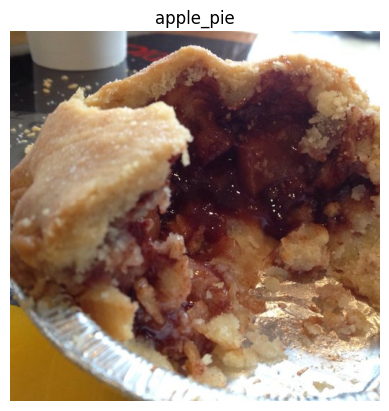

In [ ]:
img = view_random_image(target_dir="/content/food-101/train/", target_class= str(class_names[0]))

array([[[123,  93,  43],
        [122,  92,  42],
        [121,  90,  44],
        ...,
        [146, 161, 182],
        [142, 157, 176],
        [140, 155, 174]],

       [[120,  89,  42],
        [119,  88,  41],
        [118,  87,  41],
        ...,
        [126, 141, 160],
        [123, 138, 157],
        [120, 135, 154]],

       [[116,  85,  39],
        [115,  84,  38],
        [114,  83,  39],
        ...,
        [107, 123, 139],
        [103, 119, 135],
        [100, 116, 132]],

       ...,

       [[155, 105,  16],
        [155, 105,  16],
        [155, 105,  16],
        ...,
        [217, 228, 230],
        [221, 232, 234],
        [222, 236, 237]],

       [[156, 106,  17],
        [156, 106,  17],
        [155, 105,  16],
        ...,
        [201, 216, 223],
        [207, 226, 232],
        [213, 232, 238]],

       [[156, 106,  17],
        [156, 106,  17],
        [156, 106,  17],
        ...,
        [190, 209, 216],
        [200, 220, 229],
        [207, 230, 238]]], dtype=uint8)
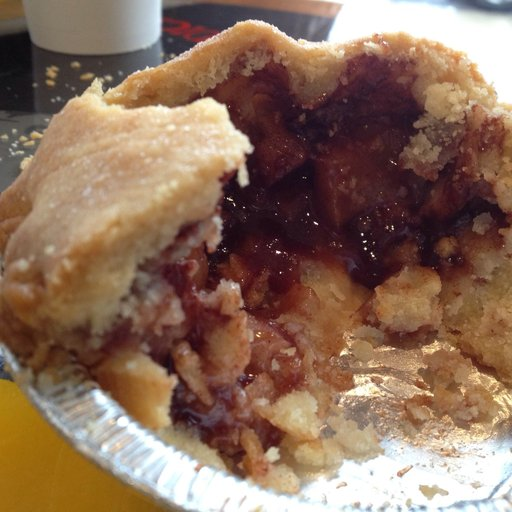

In [ ]:
img[:][:][:]

In [ ]:
img[:][:][:]/255

array([[[0.48235294, 0.36470588, 0.16862745],
        [0.47843137, 0.36078431, 0.16470588],
        [0.4745098 , 0.35294118, 0.17254902],
        ...,
        [0.57254902, 0.63137255, 0.71372549],
        [0.55686275, 0.61568627, 0.69019608],
        [0.54901961, 0.60784314, 0.68235294]],

       [[0.47058824, 0.34901961, 0.16470588],
        [0.46666667, 0.34509804, 0.16078431],
        [0.4627451 , 0.34117647, 0.16078431],
        ...,
        [0.49411765, 0.55294118, 0.62745098],
        [0.48235294, 0.54117647, 0.61568627],
        [0.47058824, 0.52941176, 0.60392157]],

       [[0.45490196, 0.33333333, 0.15294118],
        [0.45098039, 0.32941176, 0.14901961],
        [0.44705882, 0.3254902 , 0.15294118],
        ...,
        [0.41960784, 0.48235294, 0.54509804],
        [0.40392157, 0.46666667, 0.52941176],
        [0.39215686, 0.45490196, 0.51764706]],

       ...,

       [[0.60784314, 0.41176471, 0.0627451 ],
        [0.60784314, 0.41176471, 0.0627451 ],
        [0.60784314, 0